## Import Libraries

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
url = "https://raw.githubusercontent.com/sulthanahmed31/data-mining/refs/heads/main/adult.csv"
dataset = pd.read_csv(url,sep=',')
#dataset.sample(n=10)
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Exploratory Data Analysis

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
#to showing the mean,std,min,max and more from each column
dataset.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
#mengecek dan drop yang null
dataset.dropna(inplace=True)
dataset.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


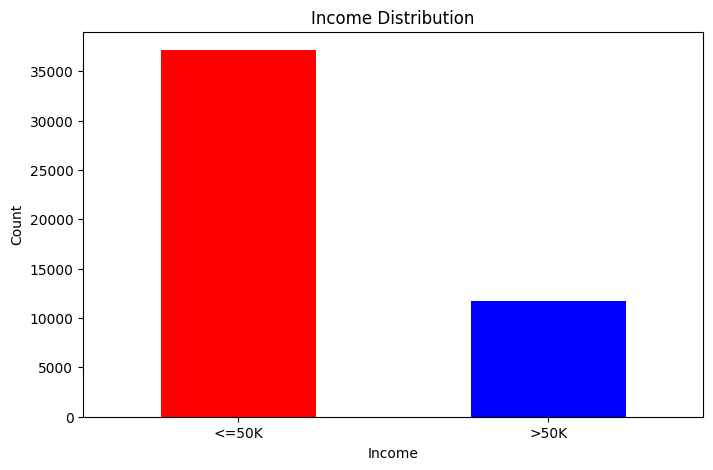

In [6]:
dataset.replace('?', pd.NA, inplace=True)

# Step 3: Group the data (example: count income levels)
income_counts = dataset['income'].value_counts()

# Step 4: Plot the bar chart
plt.figure(figsize=(8, 5))
income_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Machine Learning

1. Splitting X and y

In [12]:
X = dataset.drop('income', axis=1)
y = dataset['income']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42)


In [14]:
X_train.shape,X_test.shape

((32724, 14), (16118, 14))

In [16]:
# Import DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Instantiate the DecisionTreeClassifier model using the 'entropy' criterion
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Fit the model with training data
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [17]:
# Make predictions using the model with the 'entropy' criterion
y_pred_entropy = clf_entropy.predict(X_test)


In [20]:
#to know model accuracy score with criterion entrophy
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format (accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion entropy: 0.8411


[Text(0.5, 0.875, 'x[29] <= 0.5\nentropy = 0.793\nsamples = 39073\nvalue = [29735, 9338]'),
 Text(0.25, 0.625, 'x[3] <= 7055.5\nentropy = 0.341\nsamples = 21131\nvalue = [19788, 1343]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= 12.5\nentropy = 0.278\nsamples = 20772\nvalue = [19774, 998]'),
 Text(0.0625, 0.125, 'entropy = 0.16\nsamples = 16668\nvalue = [16279, 389]'),
 Text(0.1875, 0.125, 'entropy = 0.606\nsamples = 4104\nvalue = [3495, 609]'),
 Text(0.375, 0.375, 'x[3] <= 8296.0\nentropy = 0.238\nsamples = 359\nvalue = [14, 345]'),
 Text(0.3125, 0.125, 'entropy = 0.98\nsamples = 24\nvalue = [10, 14]'),
 Text(0.4375, 0.125, 'entropy = 0.093\nsamples = 335\nvalue = [4, 331]'),
 Text(0.75, 0.625, 'x[2] <= 11.5\nentropy = 0.991\nsamples = 17942\nvalue = [9947.0, 7995.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[3] <= 5095.5\nentropy = 0.906\nsamples = 12071\nvalue = [8189.0, 3882.0]'),
 Text(0.5625, 0.125, 'entropy = 0.867\nsamples = 11499\nvalue = [8179, 

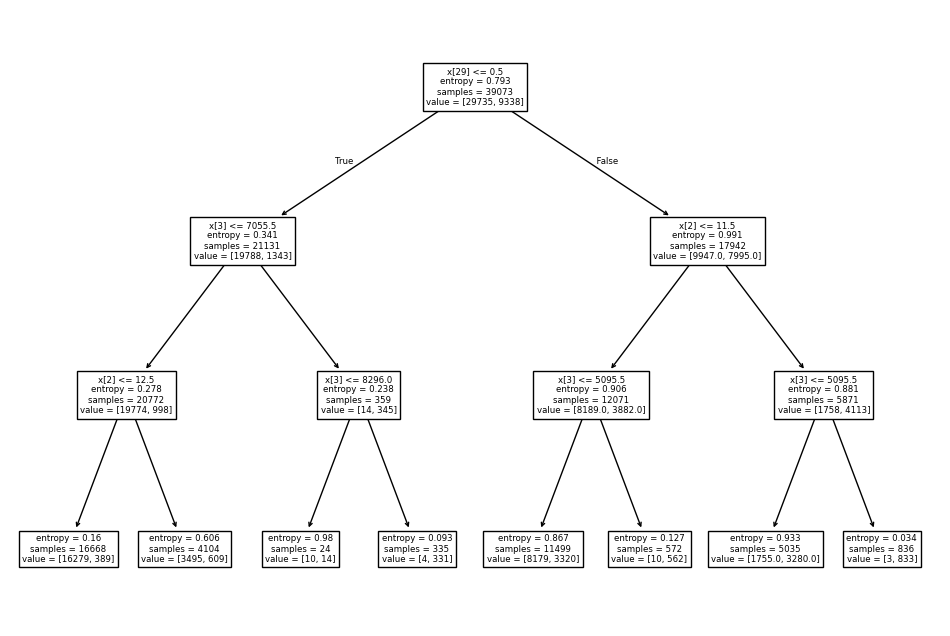

In [19]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_entropy.fit(X_train, y_train))

In [21]:
# Import DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Make DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# train model with data training
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [22]:
y_pred_gini = clf_gini.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

#calculating and showing score of Model accuracy score with criterion gini index
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))


Model accuracy score with criterion gini index: 0.8411


In [24]:
print(f"Training set score: {clf_gini.score(X_train, y_train):.4f}")
print(f"Test set score: {clf_gini.score(X_test, y_test):.4f}")

Training set score: 0.8439
Test set score: 0.8411


[Text(0.5, 0.875, 'x[29] <= 0.5\ngini = 0.364\nsamples = 39073\nvalue = [29735, 9338]'),
 Text(0.25, 0.625, 'x[3] <= 7055.5\ngini = 0.119\nsamples = 21131\nvalue = [19788, 1343]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= 13.5\ngini = 0.091\nsamples = 20772\nvalue = [19774, 998]'),
 Text(0.0625, 0.125, 'gini = 0.069\nsamples = 19647\nvalue = [18939, 708]'),
 Text(0.1875, 0.125, 'gini = 0.383\nsamples = 1125\nvalue = [835, 290]'),
 Text(0.375, 0.375, 'x[3] <= 8296.0\ngini = 0.075\nsamples = 359\nvalue = [14, 345]'),
 Text(0.3125, 0.125, 'gini = 0.486\nsamples = 24\nvalue = [10, 14]'),
 Text(0.4375, 0.125, 'gini = 0.024\nsamples = 335\nvalue = [4, 331]'),
 Text(0.75, 0.625, 'x[2] <= 11.5\ngini = 0.494\nsamples = 17942\nvalue = [9947.0, 7995.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[3] <= 5095.5\ngini = 0.436\nsamples = 12071\nvalue = [8189.0, 3882.0]'),
 Text(0.5625, 0.125, 'gini = 0.411\nsamples = 11499\nvalue = [8179, 3320]'),
 Text(0.6875, 0.125, 'g

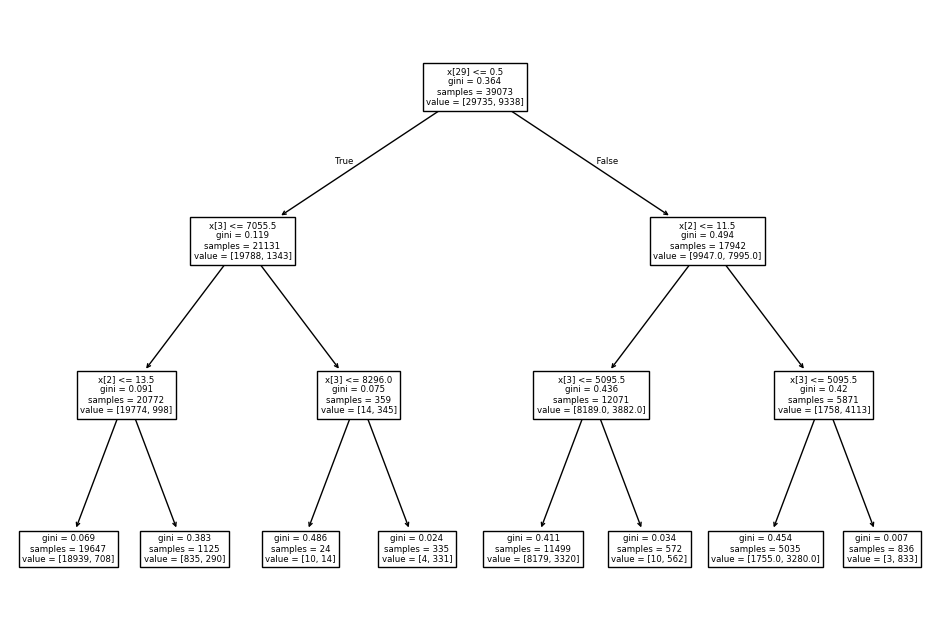

In [25]:
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

3. Confusion matrix and classification report of criterion Entropy and Gini index

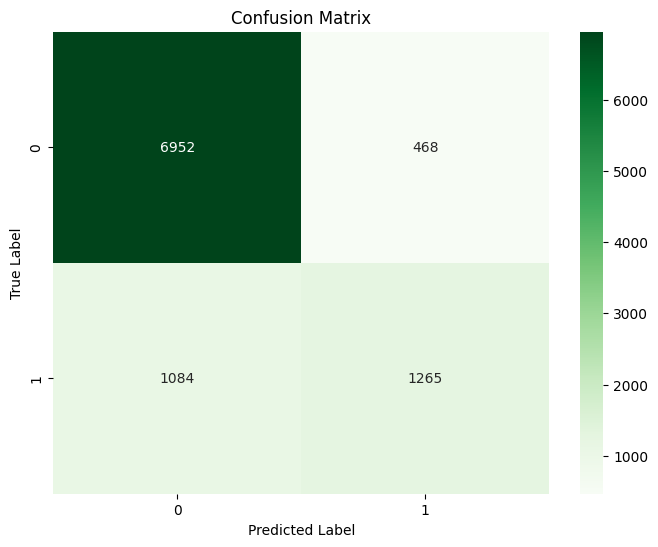

In [26]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

# Set labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      7420
        >50K       0.73      0.54      0.62      2349

    accuracy                           0.84      9769
   macro avg       0.80      0.74      0.76      9769
weighted avg       0.83      0.84      0.83      9769



from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

In [28]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [29]:
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 79.51%
Confusion Matrix:
[[7028  392]
 [1610  739]]


In [30]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      7420
        >50K       0.65      0.31      0.42      2349

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



In [31]:
print(f"Conclusion: The model achieved an accuracy of {accuracy * 100:.2f}% on the test set.")


Conclusion: The model achieved an accuracy of 79.51% on the test set.
